# Covid 19 data

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [59]:
import os
os.getcwd()

'C:\\Users\\Yaseed\\Desktop\\GitHub\\python-code-datasets\\DataScience_help'

In [60]:
df = pd.read_csv('covid_19_data.csv')

In [61]:
df.drop(['SNo', 'Last Update'], axis=1, inplace=True) # do on columns and reflect on df

In [62]:
df.rename(columns={'ObservationDate': 'Date', 'Province/State': 'Province', 'Country/Region': 'Country'}, inplace = True)

In [63]:
df['Date'] = pd.to_datetime(df['Date'])  # yyyy-mm-dd

In [64]:
df.head(5)

,Date,Province,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.00,0.00,0.00
1,2020-01-22,Beijing,Mainland China,14.00,0.00,0.00
2,2020-01-22,Chongqing,Mainland China,6.00,0.00,0.00
3,2020-01-22,Fujian,Mainland China,1.00,0.00,0.00
4,2020-01-22,Gansu,Mainland China,0.00,0.00,0.00


In [166]:
# imputer does not working for some reason when trying to group by country and date
#imputer = SimpleImputer(strategy = 'constant')
#df2 = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

df2 = df.fillna(0)

In [167]:
df3 = df2.groupby(['Country','Date'])[['Country', 'Date', 'Confirmed', 'Deaths', 'Recovered']].sum(numeric_only = True).reset_index()

In [168]:
df3

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.00,0.00,0.00
1,"('St. Martin',)",2020-03-10,2.00,0.00,0.00
2,Afghanistan,2020-02-24,1.00,0.00,0.00
3,Afghanistan,2020-02-25,1.00,0.00,0.00
4,Afghanistan,2020-02-26,1.00,0.00,0.00
...,...,...,...,...,...
87276,occupied Palestinian territory,2020-03-12,0.00,0.00,0.00
87277,occupied Palestinian territory,2020-03-14,0.00,0.00,0.00
87278,occupied Palestinian territory,2020-03-15,0.00,0.00,0.00
87279,occupied Palestinian territory,2020-03-16,0.00,0.00,0.00


In [169]:
countries = df3['Country'].unique()
len(countries)

229

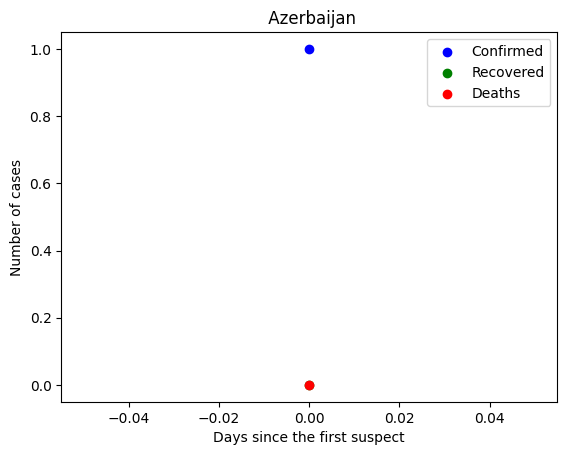

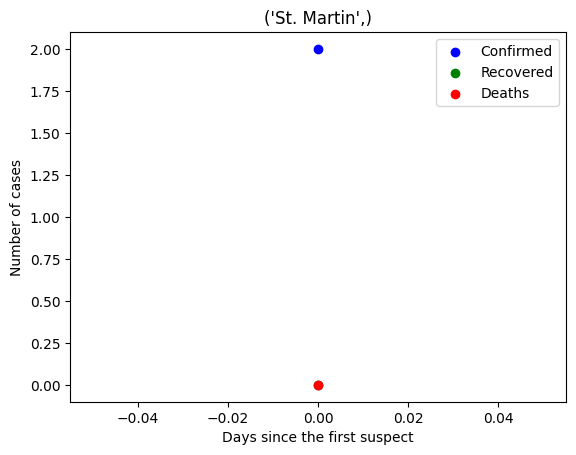

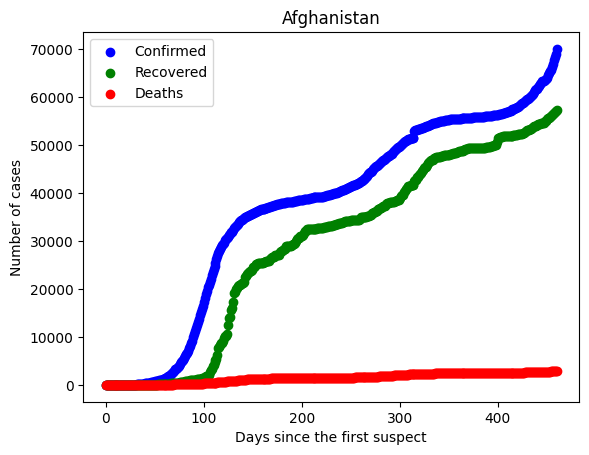

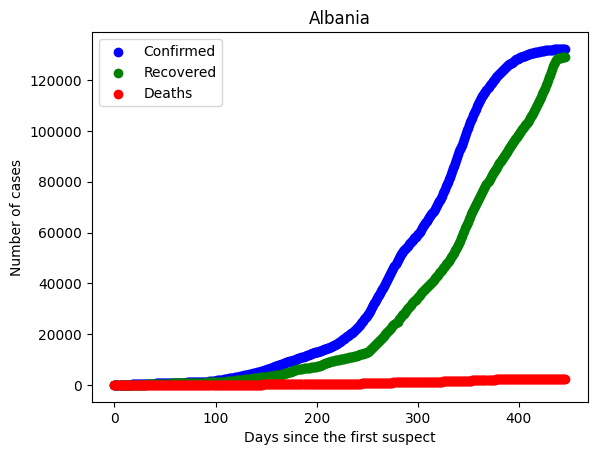

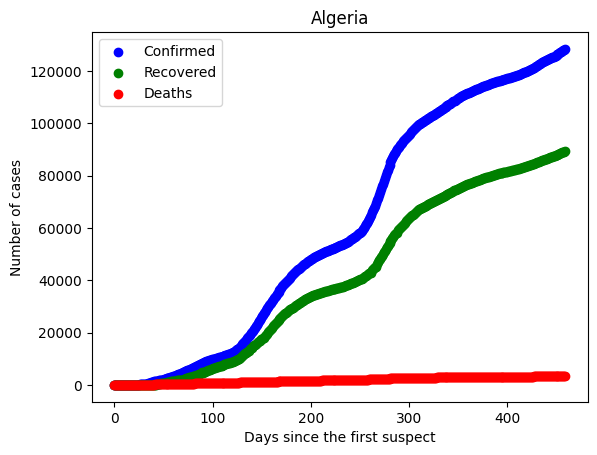

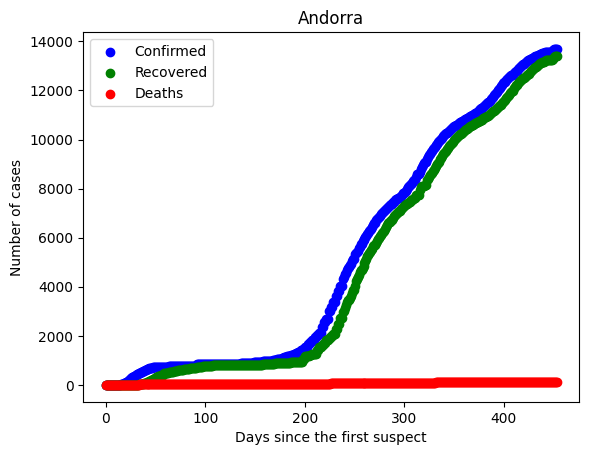

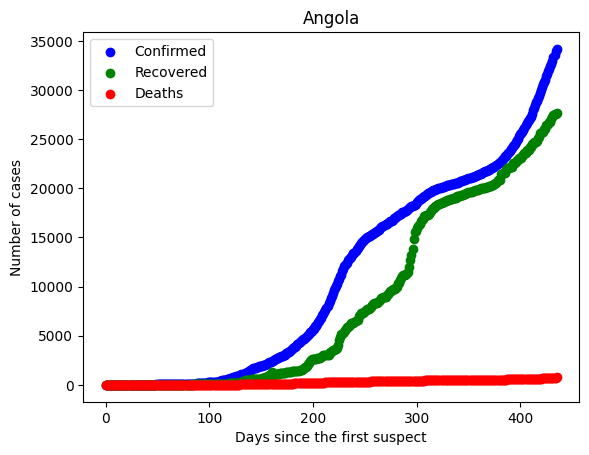

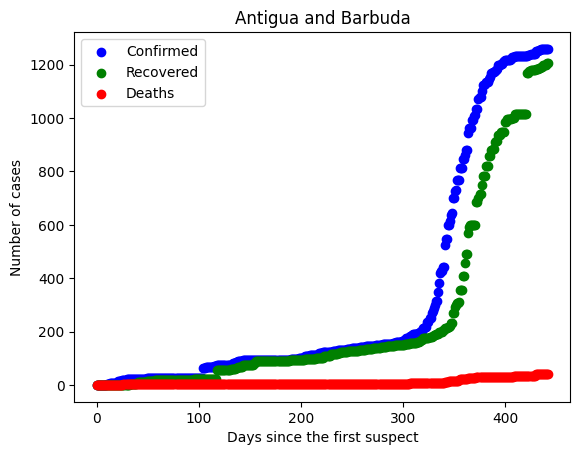

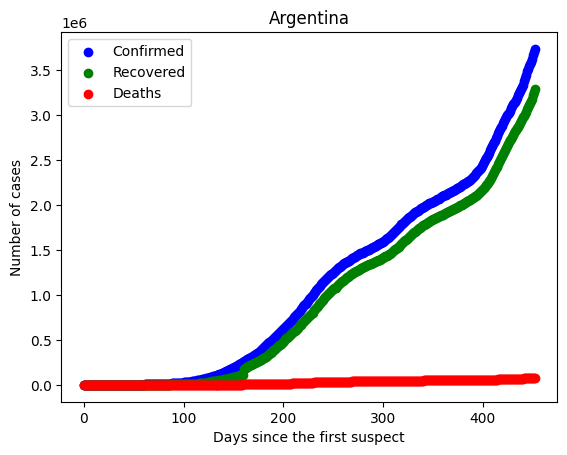

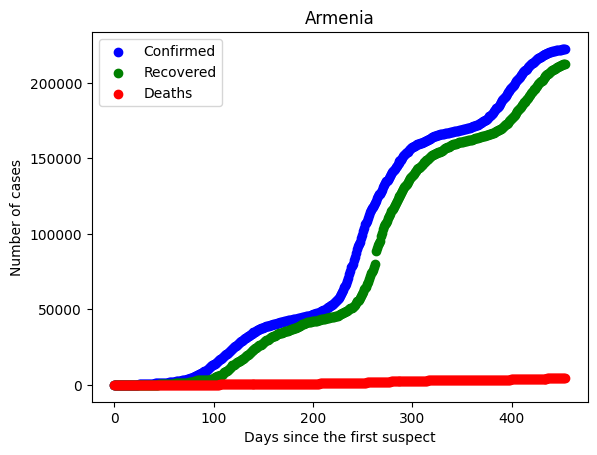

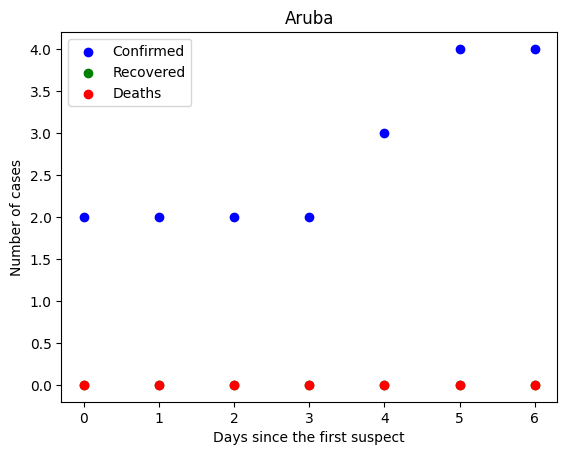

In [ ]:
for idx in range(0, len(countries)):
    C = df3[df3['Country']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(C)), C['Confirmed'], color = 'b', label = 'Confirmed')
    plt.scatter(np.arange(0,len(C)), C['Recovered'], color = 'g', label = 'Recovered')
    plt.scatter(np.arange(0,len(C)), C['Deaths'], color = 'r', label = 'Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [ ]:
 df4 = df3.groupby('Date')[['Date', 'Confirmed', 'Deaths', 'Recovered']].sum(numeric_only = True).reset_index()

In [ ]:
    C = df4
    plt.scatter(np.arange(0,len(C)), C['Confirmed'], color = 'b', label = 'Confirmed')
    plt.scatter(np.arange(0,len(C)), C['Recovered'], color = 'g', label = 'Recovered')
    plt.scatter(np.arange(0,len(C)), C['Deaths'], color = 'r', label = 'Deaths')
    plt.title('World')
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()